# Gal4p binding and CGG half sites data
This module is for investigating the quantitative correlation between zinc cluster binding and strength (TPH) and CGG half sites

In [1]:
from analyze_sig_hits_v2 import *
import scipy
import matplotlib.pyplot as plt
from scipy import stats
from Bio.Seq import Seq

## Find number of CGG forward and CCG reverse sites

In [5]:
def count_site(seq, sig_file):
    """
    This function counts the number of CGG half sites for each intergenic region and adds a column with the total number
    """
    f = Seq(seq)
    r = f.reverse_complement()
    count = []
    for row in sig_file.itertuples():
        count.append(row.Sequence.count(f) + row.Sequence.count(r))
    sig_file["Counts"] = count

# Analyzing blockify's output 

In [6]:
def add_seq(sighits_frame,yeast_genomic_sequence_file='/scratch/ref/rmlab/calling_card_ref/yeast/sacCer3/S288C_reference_sequence_R64-1-1_20110203.fsa',bases_into_gene=150):
	"""This function takes a significant hits files as input and returns a frame with the significant hits
	file as a frame plus the sequence of the intergenic region as an added column.  The sequence is a 
	SeqRecord object"""
	
	#open significant hits file and get top (or bottom) r entries.  
	

	#load the yeast genome into memory
	yeast_genome = {}
	count = 1
	for seq_record in SeqIO.parse(yeast_genomic_sequence_file,"fasta"):
		yeast_genome[count] = seq_record
		yeast_genome[count].alphabet = IUPAC.unambiguous_dna
		count = count + 1

	seq_frame = pd.DataFrame(index = sighits_frame.index,columns = ['Sequence'])
    #print(seq_frame)

	#loop through the intergenic region names and put the corresponding sequences in a list of sequence records
	#name = name + chormosome and start and end.  Sequence = grabbed sequence

	for idx,row in sighits_frame.iterrows():
		ig_sequence = yeast_genome[int(Chromosome_Dict[sighits_frame.ix[idx,'Chr']])].seq[int(sighits_frame.ix[idx,'Start'])-1-bases_into_gene:int(sighits_frame.ix[idx,'End'])+bases_into_gene]
		ig_sequence.alphabet = IUPAC.unambiguous_dna
		seq_frame.ix[idx]["Sequence"] = ig_sequence
	sighits_frame = sighits_frame.join(seq_frame)
	return sighits_frame

In [72]:
tf_bedgraph = pd.read_csv("cha4_final.bedgraph", "\t", header = None)


In [73]:
tf_bedgraph.columns = ["Chr", "Start", "End", "Score"]
tf_bedgraph = tf_bedgraph[~tf_bedgraph["Chr"].str.contains("chrM")]

In [74]:
Chromosome_Dict={"chrI":1, "chrII":2, "chrIII":3, "chrIV":4, "chrV":5, "chrVI":6, "chrVII":7, "chrVIII":8, "chrIX":9, "chrX":10, "chrXI":11, "chrXII":12, "chrXIII":13, "chrXIV":14, "chrXV":15, "chrXVI":16, "chrM":17}



In [75]:
tf_bedgraph

,Chr,Start,End,Score
0,chrII,680161,680306,60.125717
1,chrIII,1842,6648,519.267559
2,chrIII,8579,9190,300.628587
3,chrIII,10784,11546,245.968844
4,chrIII,14048,31276,16059.032523
5,chrIII,38939,41195,153.047281
6,chrIII,50417,50756,103.853512
7,chrIII,78159,78403,120.251435
8,chrIV,591554,591749,125.717409
9,chrIX,258308,258862,1333.697732


In [76]:
sighits2= add_seq(tf_bedgraph, bases_into_gene=0)

In [82]:
#Adds the PWM info based on the reccomended PWM cutoff 
bound_tf = add_pwm_info(sighits2, "cha4", 8.98)

In [83]:
bound_tf["Motif"]=bound_tf["cha4 score"].apply(lambda x: 0 if x == [] else 1)

In [84]:
bound_tf

,Chr,Start,End,Score,Sequence,Cha4 pos,Cha4 score,Cha4 orientaion,cha4 pos,cha4 score,cha4 orientaion,Motif
0,chrII,680161,680306,60.125717,"(G, A, T, T, A, A, C, G, G, G, A, G, A, G, G, ...",[],[],[],[],[],[],0
1,chrIII,1842,6648,519.267559,"(G, A, A, A, T, T, G, C, T, T, C, C, T, T, T, ...",[],[],[],[],[],[],0
2,chrIII,8579,9190,300.628587,"(A, A, A, A, A, A, A, A, A, A, A, A, A, A, A, ...",[],[],[],[],[],[],0
3,chrIII,10784,11546,245.968844,"(T, T, G, G, T, G, G, T, G, T, G, C, T, T, T, ...",[],[],[],[],[],[],0
4,chrIII,14048,31276,16059.032523,"(C, A, T, T, T, A, G, T, T, T, T, T, A, G, T, ...",[3071],[9.1],[-1],[3071],[9.1],[-1],1
5,chrIII,38939,41195,153.047281,"(G, T, A, T, T, T, C, C, T, T, T, G, C, G, T, ...",[],[],[],[],[],[],0
6,chrIII,50417,50756,103.853512,"(T, G, G, A, A, A, A, A, G, A, G, A, C, T, A, ...",[],[],[],[],[],[],0
7,chrIII,78159,78403,120.251435,"(T, T, A, G, C, C, G, T, C, T, T, A, T, C, A, ...",[],[],[],[],[],[],0
8,chrIV,591554,591749,125.717409,"(A, A, A, A, A, T, G, T, T, G, T, G, G, C, C, ...",[],[],[],[],[],[],0
9,chrIX,258308,258862,1333.697732,"(T, T, G, T, C, C, T, T, T, T, T, A, C, C, T, ...",[156],[9.37],[-1],[156],[9.37],[-1],1


In [85]:
count_site("CGG",bound_tf)

In [87]:
#Make a new df with sequences that contain no motif 
nosite_bound = bound_tf[bound_tf["Motif"] == 0]

In [88]:
nosite_bound = nosite_bound.reset_index()

In [89]:
nosite_bound

,index,Chr,Start,End,Score,Sequence,Cha4 pos,Cha4 score,Cha4 orientaion,cha4 pos,cha4 score,cha4 orientaion,Motif,Counts
0,0,chrII,680161,680306,60.125717,"(G, A, T, T, A, A, C, G, G, G, A, G, A, G, G, ...",[],[],[],[],[],[],0,7
1,1,chrIII,1842,6648,519.267559,"(G, A, A, A, T, T, G, C, T, T, C, C, T, T, T, ...",[],[],[],[],[],[],0,54
2,2,chrIII,8579,9190,300.628587,"(A, A, A, A, A, A, A, A, A, A, A, A, A, A, A, ...",[],[],[],[],[],[],0,8
3,3,chrIII,10784,11546,245.968844,"(T, T, G, G, T, G, G, T, G, T, G, C, T, T, T, ...",[],[],[],[],[],[],0,7
4,5,chrIII,38939,41195,153.047281,"(G, T, A, T, T, T, C, C, T, T, T, G, C, G, T, ...",[],[],[],[],[],[],0,23
5,6,chrIII,50417,50756,103.853512,"(T, G, G, A, A, A, A, A, G, A, G, A, C, T, A, ...",[],[],[],[],[],[],0,11
6,7,chrIII,78159,78403,120.251435,"(T, T, A, G, C, C, G, T, C, T, T, A, T, C, A, ...",[],[],[],[],[],[],0,6
7,8,chrIV,591554,591749,125.717409,"(A, A, A, A, A, T, G, T, T, G, T, G, G, C, C, ...",[],[],[],[],[],[],0,7
8,10,chrIX,386631,387196,267.832741,"(C, C, C, T, A, G, T, T, A, C, G, T, A, T, A, ...",[],[],[],[],[],[],0,8
9,11,chrV,294908,295260,169.445204,"(C, A, A, G, A, A, A, A, A, A, A, A, A, T, C, ...",[],[],[],[],[],[],0,3


In [90]:
c = nosite_bound["Counts"].tolist()
s = nosite_bound["Score"].tolist()

In [91]:
#x = np.asarray(c)
x = np.asarray(c)
y = np.asarray(s)

In [92]:
slope, intercept, r, p, std_err = scipy.stats.linregress(x,y)

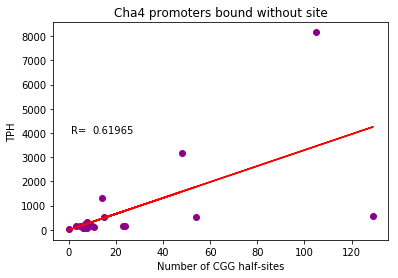

In [95]:
fig, ax = plt.subplots()
plt.plot(c, s, marker='o', color = "darkmagenta", linestyle="none")
plt.plot(x, intercept + slope*x, 'r')
ax.set_title("Cha4 promoters bound without site")
ax.set_xlabel("Number of CGG half-sites")
ax.set_ylabel("TPH")
ax.annotate("R=", xy=(1,4000), xycoords='data')
ax.annotate(round(r, 5), xy=(10, 4000), xycoords='data')
plt.savefig("Cha4_combined_blockify.pdf")

In [20]:
#Functions that do the same thing as above 
def nosite_bound(bedgraph, tf, PWM_score):
    tf_bedgraph = pd.read_csv(bedgraph, "\t", header = None)
    tf_bedgraph.columns = ["Chr", "Start", "End", "Score"]
    tf_bedgraph = tf_bedgraph[~tf_bedgraph["Chr"].str.contains("chrM")]
    Chromosome_Dict={"chrI":1, "chrII":2, "chrIII":3, "chrIV":4, "chrV":5, "chrVI":6, "chrVII":7, "chrVIII":8, "chrIX":9, "chrX":10, "chrXI":11, "chrXII":12, "chrXIII":13, "chrXIV":14, "chrXV":15, "chrXVI":16, "chrM":17}
    sighits2= add_bleep(tf_bedgraph, bases_into_gene=0)
    bound_tf = add_pwm_info(sighits2, tf, PWM_score)
    bound_tf["Motif"]=bound_tf[tf+ " score"].apply(lambda x: 0 if x == [] else 1)
    count_site("CGG",bound_tf)
    bound_tf["Counts"] = bound_tf["Counts"].replace(0, 1)
    bound_tf["Sequence_length"] = bound_tf["Sequence"].apply(len)
    nosite_bound = bound_tf[bound_tf["Motif"] == 0]
    c = nosite_bound["Counts"].tolist()
    s = nosite_bound["Score"].tolist()
    
    return c, s 

In [21]:
gal4_c, gal4_s = nosite_bound("gal4_FL.bedgraph", "gal4", 13)

In [22]:
def make_graph(c, s, tf):
    x = np.asarray(c)
    y = np.asarray(s)
    slope, intercept, r, p, std_err = scipy.stats.linregress(x,y)
    fig, ax = plt.subplots()
    plt.plot(c, s, marker='o', color = "darkmagenta", linestyle="none")
    plt.plot(x, intercept + slope*x, 'r')
    ax.set_title(tf + " promoters bound without site")
    ax.set_xlabel("Number of CGG half-sites")
    ax.set_ylabel("TPH")
    ax.annotate("R=", xy=(1,2000), xycoords='data')
    ax.annotate(round(r, 5), xy=(10, 2000), xycoords='data')
    #plt.show
    plt.savefig(tf +"gal4_FL_blockify.pdf")

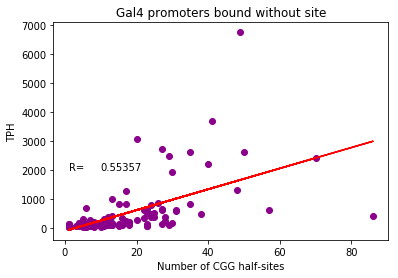

In [23]:
make_graph(gal4_c, gal4_s, "Gal4")